In [ ]:
import pandas as pd
import pdfplumber
import datetime as dt
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

from datetime import datetime

In [2]:
# Put records docs into lists
date_files = ["records/Anoka/AnokaDates2024_1.pdf",
              "records/Anoka/AnokaDates2024_2.pdf",
              "records/Anoka/AnokaDates2024_3.pdf",
              "records/Anoka/AnokaDates2024_4.pdf",
              "records/Anoka/AnokaDates2024_5.pdf",
              "records/Anoka/AnokaDates2024_6.pdf",
              "records/Anoka/AnokaDates2024_7.pdf",
              "records/Anoka/AnokaDates2024_8.pdf",
              "records/Anoka/AnokaDates2024_9.pdf",
              "records/Anoka/AnokaDates2024_10.pdf",
              "records/Anoka/AnokaDates2024_11.pdf"]

sale_files = ["records/Anoka/AnokaSales2024_1.pdf",
              "records/Anoka/AnokaSales2024_2.pdf",
              "records/Anoka/AnokaSales2024_3.pdf",
              "records/Anoka/AnokaSales2024_4.pdf",
              "records/Anoka/AnokaSales2024_5.pdf",
              "records/Anoka/AnokaSales2024_6.pdf",
              "records/Anoka/AnokaSales2024_7.pdf",
              "records/Anoka/AnokaSales2024_8.pdf",
              "records/Anoka/AnokaSales2024_9.pdf",
              "records/Anoka/AnokaSales2024_10.pdf",
              "records/Anoka/AnokaSales2024_11.pdf"]

In [3]:
# Create lists to hold extracted data
parcel_date = []
saleDate = []

parcel_sales = []
eCRV = []
owner = []
address = []
city = []
zip = []

In [4]:
# Loop to extract date data
for i in date_files:
    pdf = pdfplumber.open(i)

    for p in pdf.pages:
        page = p.extract_table()

        for x in page:
            parcel_date.append(x[0])
            saleDate.append(x[2])

In [5]:
# Loop to extract sale data
for s in sale_files:
    pdf = pdfplumber.open(s)

    for p in pdf.pages:
        page = p.extract_table()
        
        for x in page:
            parcel_sales.append(x[0])
            eCRV.append(x[1])
            owner.append(x[2])
            address.append(x[3])
            city.append(x[4])
            zip.append(x[5])

In [6]:
d = {"ParcelID": parcel_date, "Date": saleDate}
df_dates = pd.DataFrame(d)
df_dates['Date'] = df_dates['Date'].apply(lambda x: datetime.strptime(x, "%d-%b-%Y"))
df_dates.sort_values(by = "Date", inplace = True)
len(df_dates)

7314

In [7]:
df_dates.drop_duplicates("ParcelID", inplace = True, keep = 'last')
df_dates.reset_index(inplace = True, drop = True)
len(df_dates)

6651

In [8]:
df_dates.head(3)

,ParcelID,Date
0,033124330013,2024-01-01
1,313223440063,2024-01-01
2,113024120020,2024-01-01


In [9]:
dSales = {"ParcelID": parcel_sales, "eCRV": eCRV, "Owner Name": owner, 
          "Address": address, "City": city, "Zip": zip}
df_sales = pd.DataFrame(dSales)
df_sales.sort_values(by = "ParcelID", inplace = True)
len(df_sales)

7109

In [10]:
df_sales.drop_duplicates("ParcelID", inplace = True, keep = 'last')
df_sales.reset_index(inplace = True, drop = True)
len(df_sales)

6651

In [11]:
df_sales.head(3)

,ParcelID,eCRV,Owner Name,Address,City,Zip
0,013024110021,,REESE MASON,8355 WESTWOOD RD NE,SPRING LAKE PARK,55432
1,013024110023,,LINDSEY TRUSTEE KEVIN K,8349 WESTWOOD RD NE,SPRING LAKE PARK,55432
2,013024110041,,BOX FAMILY TRUST DATED JULY 1...,8432 WESTWOOD RD NE,SPRING LAKE PARK,55432


In [12]:
df2 = df_sales.join(df_dates.set_index("ParcelID"), on = "ParcelID", how = "left")

In [13]:
df2.reset_index(inplace = True, drop = True)

In [14]:
df_total = df2.groupby(df2['Date'].dt.month)['Owner Name'].count()

In [15]:
df_totalSales = pd.DataFrame({"Month": df_total.index, "Number of Sales": df_total.values})

In [16]:
df_totalSales

,Month,Number of Sales
0,1,454
1,2,533
2,3,538
3,4,677
4,5,789
5,6,759
6,7,650
7,8,659
8,9,489
9,10,591


In [17]:
privEqui = "LLC|INC|INCORPORATED|FUNDS|INVESTMENT"

In [18]:
df_keep = df2[df2['Owner Name'].str.contains(privEqui)]

In [19]:
df_keep.reset_index(inplace = True, drop = True)

In [20]:
df2024 = df_keep.groupby(df_keep['Date'].dt.month)['Owner Name'].count()

In [21]:
df_totalSales['Corp Sales Count'] = df2024.values

In [22]:
df_totalSales

,Month,Number of Sales,Corp Sales Count
0,1,454,22
1,2,533,24
2,3,538,17
3,4,677,22
4,5,789,32
5,6,759,40
6,7,650,22
7,8,659,34
8,9,489,27
9,10,591,39


In [23]:
df_totalSales['Percentage of Total Sales'] = [round((df_totalSales['Corp Sales Count'][i]/df_totalSales['Number of Sales'][i] *100), 2) for i in range(len(df_totalSales))]

In [24]:
df_totalSales

,Month,Number of Sales,Corp Sales Count,Percentage of Total Sales
0,1,454,22,4.85
1,2,533,24,4.50
2,3,538,17,3.16
3,4,677,22,3.25
4,5,789,32,4.06
5,6,759,40,5.27
6,7,650,22,3.38
7,8,659,34,5.16
8,9,489,27,5.52
9,10,591,39,6.60


In [ ]:
df_totalSales.to_csv("AnokaSalesData2024.csv", index = False)

In [25]:
# Load Anoka DataFrames to plot
df1 = pd.read_csv("records/Anoka/AnokaSalesData2019.csv")
df2 = pd.read_csv("records/Anoka/AnokaSalesData2020.csv")
df3 = pd.read_csv("records/Anoka/AnokaSalesData2021.csv")
df4 = pd.read_csv("records/Anoka/AnokaSalesData2022.csv")
df5 = pd.read_csv("records/Anoka/AnokaSalesData2023.csv")
df6 = pd.read_csv("records/Anoka/AnokaSalesData2024.csv")

In [26]:
df1['Month'] = df1['Month'].apply(lambda x: "2019 " + str(x).replace(".0", "") if x == 1.0 else str(x).replace(".0", ""))
df2['Month'] = df2['Month'].apply(lambda x: "2020 " + str(x).replace(".0", "") if x == 1.0 else str(x).replace(".0", ""))
df3['Month'] = df3['Month'].apply(lambda x: "2021 " + str(x).replace(".0", "") if x == 1.0 else str(x).replace(".0", ""))
df4['Month'] = df4['Month'].apply(lambda x: "2022 " + str(x).replace(".0", "") if x == 1.0 else str(x).replace(".0", ""))
df5['Month'] = df5['Month'].apply(lambda x: "2023 " + str(x).replace(".0", "") if x == 1.0 else str(x).replace(".0", ""))
df6['Month'] = df6['Month'].apply(lambda x: "2024 " + str(x).replace(".0", "") if x == 1.0 else str(x).replace(".0", ""))

In [27]:
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index = True)

In [28]:
fontdict = {"fontfamily": "Gill Sans", "fontsize": 16}

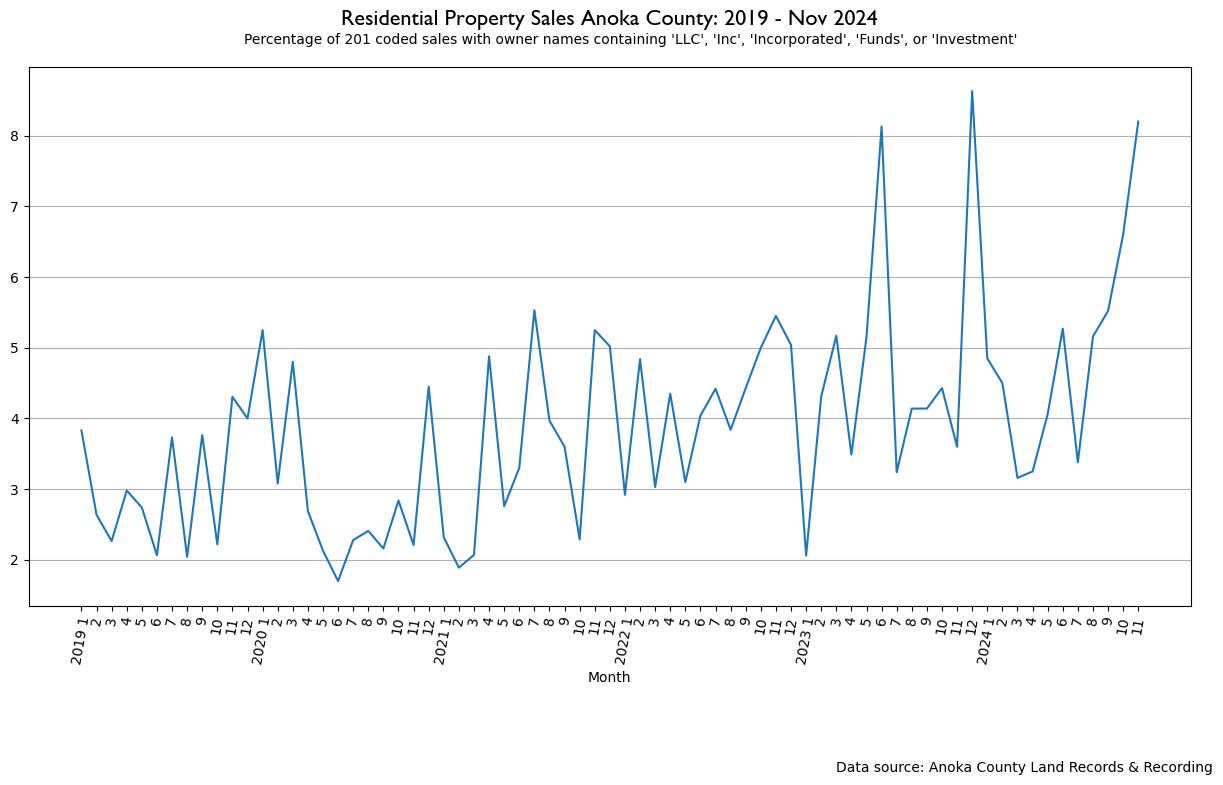

In [29]:

df.plot(kind = 'line', x = 'Month', y = 'Percentage of Total Sales', rot = 80, figsize=(15, 7), legend = False)
plt.xticks(range(len(df['Month'])), df['Month'])
plt.title("Residential Property Sales Anoka County: 2019 - Nov 2024", pad = 30, **fontdict)
plt.text(x = 10.8, y = 9.3, s = "Percentage of 201 coded sales with owner names containing 'LLC', 'Inc', 'Incorporated', 'Funds', or 'Investment'")
plt.text(x = 50.0, y = -1, s = "Data source: Anoka County Land Records & Recording")
plt.grid(axis = 'y')
plt.show()